In [1]:
import torch
from torch.nn import Linear,Module,MSELoss
from torch.optim import SGD
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
torch.__version__

/home/yanhuanqian/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/yanhuanqian/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/yanhuanqian/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/yanhuanqian/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/yanhuanqian/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Ex

'1.0.1.post2'

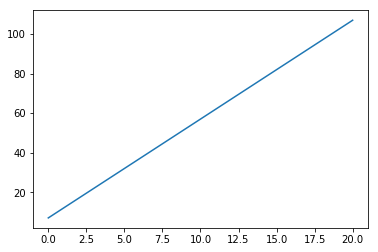

In [2]:
x=np.linspace(0,20,500)
y=x*5+7
plt.plot(x,y)

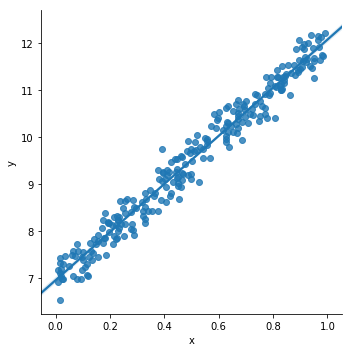

In [3]:
x=np.random.rand(256)
noise=np.random.randn(256)/4
y=x*5+7+noise
df=pd.DataFrame()
df['x']=x
df['y']=y
sns.lmplot(x='x',y='y',data=df) # 显示数据

In [7]:
model=Linear(1,1)
criterion=MSELoss() #均方误差
optim=SGD(model.parameters(),lr=0.01)
epochs=3000 # 训练300次
[w,b]=model.parameters()
x_train=x.reshape(-1,1).astype('float32')
y_train=y.reshape(-1,1).astype('float32')

In [8]:
# 训练函数
for i in range(epochs):
    i+=1
    inputs=torch.from_numpy(x_train)
    labels=torch.from_numpy(y_train) # 输入输出一定得是tensor类型
    outputs=model(inputs) # 预测
    optim.zero_grad() # 梯度置0,否则会累加
    loss=criterion(outputs,labels) #计算loss
    loss.backward() # 反向传播
    optim.step() # 使用优化器默认优化方式
    if(i%100==0):
        print('epoch {},loss {}'.format(i,loss.data.item()))

epoch 100,loss 0.5526567101478577
epoch 200,loss 0.10393691062927246
epoch 300,loss 0.09386804699897766
epoch 400,loss 0.08807970583438873
epoch 500,loss 0.08361932635307312
epoch 600,loss 0.08017335087060928
epoch 700,loss 0.07751106470823288
epoch 800,loss 0.07545413076877594
epoch 900,loss 0.07386504858732224
epoch 1000,loss 0.07263727486133575
epoch 1100,loss 0.07168864458799362
epoch 1200,loss 0.07095582783222198
epoch 1300,loss 0.07038961350917816
epoch 1400,loss 0.06995221227407455
epoch 1500,loss 0.06961420923471451
epoch 1600,loss 0.06935311108827591
epoch 1700,loss 0.069151371717453
epoch 1800,loss 0.06899552047252655
epoch 1900,loss 0.06887508183717728
epoch 2000,loss 0.06878206133842468
epoch 2100,loss 0.06871017068624496
epoch 2200,loss 0.06865464895963669
epoch 2300,loss 0.068611741065979
epoch 2400,loss 0.06857859343290329
epoch 2500,loss 0.06855299323797226
epoch 2600,loss 0.06853318959474564
epoch 2700,loss 0.06851790100336075
epoch 2800,loss 0.06850609928369522
epoch 

In [9]:
print(w.data.item(),b.data.item())

5.089757442474365 6.97382926940918


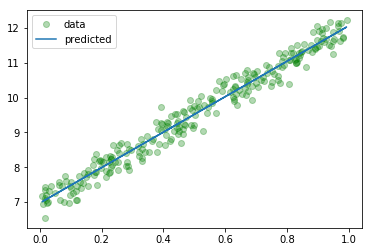

In [10]:
predicted=model.forward(torch.from_numpy(x_train)).data.numpy()
plt.plot(x_train,y_train,'go',label='data',alpha=0.3)
plt.plot(x_train,predicted,label='predicted',alpha=1)
plt.legend()
plt.show()